In [114]:
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt

# Problem 1, 2

In [100]:
def jacobi(A,b,tol,maxiters,plot=False):
    D = np.diagonal(A)
    x0 = np.zeros_like(b)
    abs_err = np.array([])
    for i in range(maxiters):
        x1 = x0+(b-A@x0)/D
        err = np.max(np.abs(x1-x0))
        abs_err = np.append(abs_err, np.max(np.abs(A@x1-b)))
        if err<tol:
            if plot:
                plt.semilogy(range(i+1),abs_err)
                plt.xlabel('Iteration')
                plt.ylabel('Absolute Error of Approximation')
                plt.title('Convergence of Jacobi Method')
                plt.show()
            return x1
        x0 = x1
    if plot:
        plt.semilogy(range(maxiters),abs_err)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Jacobi Method')
        plt.show()
    print('Did not converge after maximum number of iterations')
    return x1

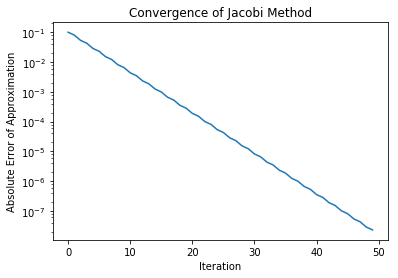

Did not converge after maximum number of iterations
True


In [101]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

tol = 1e-10
maxiters = 50

n = 7
b = np.random.random(n)
A = diag_dom(n)
x = jacobi(A,b,tol,maxiters,True)
print(np.allclose(A@x,b))

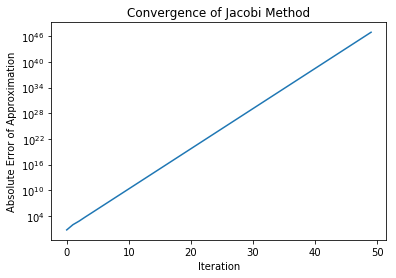

Did not converge after maximum number of iterations
False


In [102]:
# Generate random matrix
b = np.random.random(n)
A = np.random.random((n,n))
x = jacobi(A,b,tol,maxiters,plot=True)
print(np.allclose(A@x,b))

# Problem 3

In [103]:
def gauss_seidel(A,b,tol,maxiters,plot=False):
    n,n = A.shape
    x0 = np.zeros_like(b)
    abs_err = np.array([])
    for i in range(maxiters):
        x1 = np.empty_like(b)
        for k in range(n):
            x1[k] = x0[k]+(1/A[k,k])*(b[k]-A[k,:]@x0)
        err = np.max(np.abs(x1-x0))
        abs_err = np.append(abs_err, np.max(np.abs(A@x1-b)))
        if err<tol:
            if plot:
                plt.semilogy(range(i+1),abs_err)
                plt.xlabel('Iteration')
                plt.ylabel('Absolute Error of Approximation')
                plt.title('Convergence of Gauss-Seidel Method')
                plt.show()
            return x1
        x0 = x1
    if plot:
        plt.semilogy(range(maxiters),abs_err)
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.title('Convergence of Gauss-Seidel Method')
        plt.show()
    print('Did not converge after maximum number of iterations')
    return x1

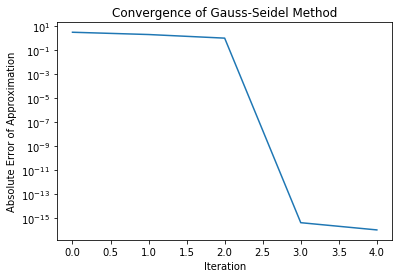

True


In [104]:
b = np.random.random(n)
A = diag_dom(n)
x = gauss_seidel(A,b,tol,maxiters,True)
print(np.allclose(A@x,b))

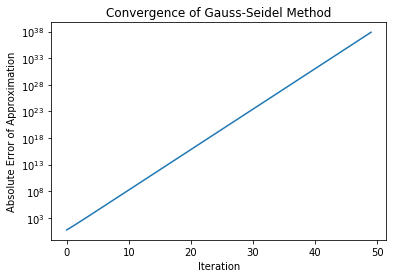

Did not converge after maximum number of iterations
False


In [105]:
b = np.random.random(n)
A = np.random.random((n,n))
x = gauss_seidel(A,b,tol,maxiters,plot=True)
print(np.allclose(A@x,b))

# Problem 4, 5

In [224]:
from scipy import sparse

def sparse_iteration(A,b,tol,maxiters,omega=1):
    n = len(b)
    x0 = np.zeros_like(b)
    for i in range(maxiters):
        x1 = np.empty_like(b)
        for k in range(n):
            rowstart = A.indptr[k]
            rowend = A.indptr[k+1]
            Aix = A.data[rowstart:rowend].flatten() @ x0[A.indices[rowstart:rowend]]
            x1[k] = x0[k]+(omega/A.toarray()[k,k])*(b[k]-Aix)
        err = np.max(np.abs(x1-x0))
        if err<tol:
            return x1, i
        x0 = x1
    return x1, i

In [163]:
n = 5000
A = sparse.csr_matrix(diag_dom(n))
b = np.random.random(n)
x = sparse_iteration(A,b,tol,maxiters)[0]
print(np.allclose(A.toarray()@x,b))

True


# Problem 6

In [225]:
def finite_difference(n,omega,tol=1e-8,maxiters=100,plot=False):
    I = sparse.coo_matrix(np.eye(n))
    B = sparse.diags([1,-4,1],[-1,0,1],shape=(n,n))
    A = sparse.bmat([[B,I,None,None],[I,B,I,None],[None,I,B,I],[None,None,I,B]],format='bsr')
    b = np.zeros(n)
    b[0] = -100
    b[-1] = -100
    b = np.tile(b,4)
    x, iteration = sparse_iteration(A,b,tol,maxiters,omega)
    if plot:
        u = np.reshape(x,(n,n))
        coord = np.linspace(1,n,n)
        plt.pcolormesh(coord,coord,u,cmap='coolwarm')
        plt.colorbar()
        plt.show()
    return x, iteration

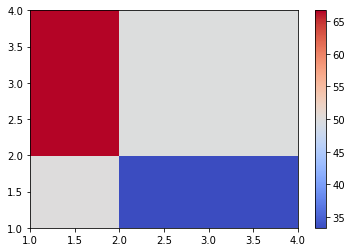

(array([ 49.99999986,  33.33333311,  33.33333311,  49.99999986,
        66.66666645,  49.99999964,  49.99999964,  66.66666645,
        66.66666645,  49.99999964,  49.99999964,  66.66666645,
        49.99999986,  33.33333311,  33.33333311,  49.99999986]), 89)


In [220]:
print(finite_difference(4,1,tol=1e-7,plot=True))

/Users/rubyzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


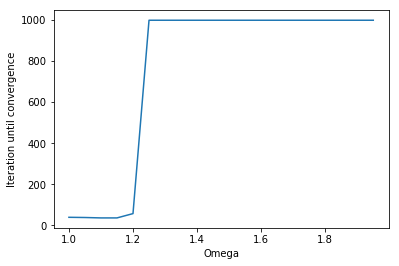

In [226]:
n = 5
tol = 1e-2
maxiters=1000
w = np.linspace(1,1.95,20)
iteration = np.empty_like(w)
for i in range(len(w)):
    u, iteration[i] = finite_difference(n,w[i],tol=tol,maxiters=maxiters)
plt.plot(w,iteration)
plt.xlabel('Omega')
plt.ylabel('Iteration until convergence')
plt.show()